In [2]:
import numpy as np

In [3]:
xeval = np.linspace(0, 10, 1000)
xint = np.linspace(0, 10, 11)


def find(xeval, a, b):
    return np.where((xeval <= b) & (xeval >= a))[0]

def func(f0, f1, x0, x1, x):
    
    m = (f1-f0)/(x1-x0)
    
    f = m*(x-x1) + f0

    return f
    
    



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


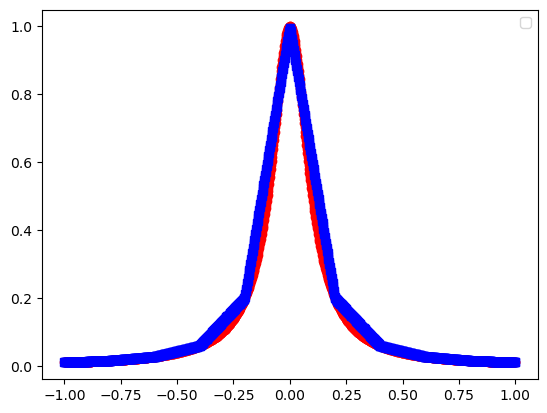

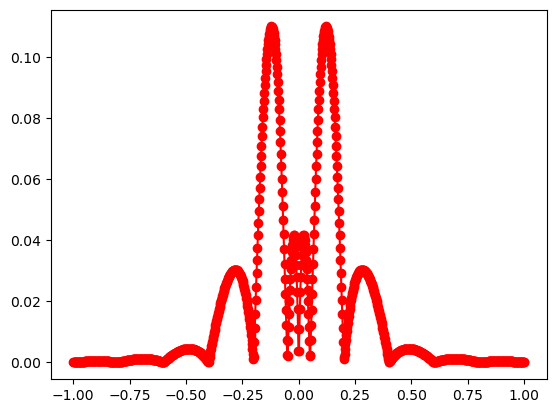

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import inv
from numpy import linalg as la


def driver():
    f = lambda x: 1/(1+(10*x)**2)
    a = -1
    b = 1
    ''' create points you want to evaluate at'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval)
    ''' number of intervals'''
    Nint = 10
    '''evaluate the linear spline'''
    yeval = eval_lin_spline(xeval,Neval,a,b,f,Nint)
    ''' evaluate f at the evaluation points'''
    fex = np.zeros(Neval)
    for j in range(Neval):
        fex[j] = f(xeval[j])
    plt.figure()
    plt.plot(xeval,fex,'ro-')
    plt.plot(xeval,yeval,'bs-')
    plt.legend()
    plt.show
    err = abs(yeval-fex)
    plt.figure()
    plt.plot(xeval,err,'ro-')
    plt.show
    
    
def eval_lin_spline(xeval,Neval,a,b,f,Nint):
    '''create the intervals for piecewise approximations'''
    xint = np.linspace(a,b,Nint+1)
    '''create vector to store the evaluation of the linear splines'''
    yeval = np.zeros(Neval)
    for jint in range(Nint):
        '''find indices of xeval in interval (xint(jint),xint(jint+1))'''
        '''let ind denote the indices in the intervals'''
        '''let n denote the length of ind'''
        '''temporarily store your info for creating a line in the interval of
            interest'''
        
        ind = find(xeval, xint[jint], xint[jint+1])
        n = len(ind)

        a1= xint[jint]
        fa1 = f(a1)
        b1 = xint[jint+1]
        fb1 = f(b1)
        for kk in range(n):
            '''use your line evaluator to evaluate the lines at each of the points
            in the interval'''
            '''yeval(ind(kk)) = call your line evaluator at xeval(ind(kk)) with
            the points (a1,fa1) and (b1,fb1)'''
            
            yeval[ind[kk]] = func(fa1, fb1, a1, b1, xeval[ind[kk]])
            
    return yeval
        
            

driver()

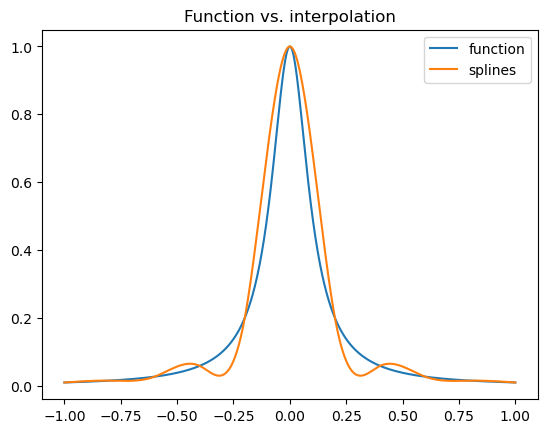

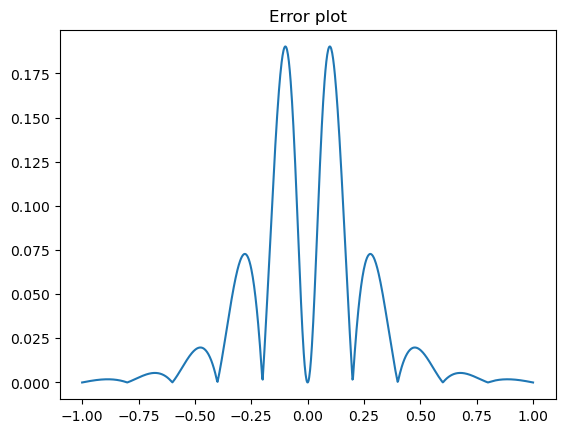

In [29]:
def find_M(xint, f):
    
    N = len(xint) - 1
    
    f = lambda x: 1/(1+(10*x)**2)
    matrix = np.zeros((N-1, N-1))
    
    fex = f(xint)
    h = abs(xint[1] - xint[0])
    
    for i in range(Nint-1):
        for j in range(Nint-1):
            if i==j:
                matrix[i,j] = 1/3
            if i==(j+1):
                matrix[i,j] = 1/12
            if i==(j-1):
                matrix[i,j] = 1/12
                
    yint = np.zeros(N-1)
    for i in range(N-1):
        yint[i] = (fex[i+2] - 2*fex[i+1] + fex[i])/(2*h**2)
        
    M = np.matmul(inv(matrix), yint)
    M = np.append(M,0)
    M = np.append(0,M)
    
    return M
    
    
def cubic_poly_eval(Mi, Mip1, xi, xip1, fxi, fxip1, x):
    h = abs(xip1 - xi)
    C = (fxi/h) - ((h*Mi)/6)
    D = (fxip1/h) - ((h*Mip1)/6)
    return ((xip1-x)**3)*Mi/(6*h) + ((x-xi)**3)*Mip1/(6*h) + C*(xip1-x) + D*(x-xi)

def cubic_spline(xeval, a, b, f, N, Neval):
    xint = np.linspace(a, b, N+1)
    yeval = np.zeros(Neval)
        
    M = find_M(xint, f)
    
    for j in range(N):
        ind = find(xeval, xint[j], xint[j+1])
        n = len(ind)
        
        a1 = xint[j]
        b1 = xint[j+1]
        fa1 = f(a1)
        fb1 = f(b1)
        Mi = M[j]
        Mip1 = M[j+1]
        
        for kk in range(n):
            '''use your line evaluator to evaluate the lines at each of the points 
           in the interval'''
            '''yeval(ind(kk)) = call your line evaluator at xeval(ind(kk)) with 
           the points (a1,fa1) and (b1,fb1)'''
            yeval[ind[kk]] = cubic_poly_eval(Mi, Mip1, a1, b1, fa1, fb1, xeval[ind[kk]])
            
    return yeval

f = lambda x: 1 / (1 + (10*x)**2)
a = -1
b = 1

''' create points you want to evaluate at'''
Neval = 1000
xeval =  np.linspace(a,b,Neval)

''' number of intervals'''
N = 10

'''evaluate the cubic spline'''
yeval = cubic_spline(xeval, a,b,f,N,Neval)

''' evaluate f at the evaluation points'''
fex = np.zeros(Neval)
for j in range(Neval):
    fex[j] = f(xeval[j]) 


plt.figure()
plt.plot(xeval,fex, label='function')
plt.plot(xeval,yeval, label='splines')
plt.title('Function vs. interpolation')
plt.legend()
plt.show()

err = abs(yeval-fex)
plt.figure()
plt.title('Error plot')
plt.plot(xeval,err)
plt.show()